## View Sample

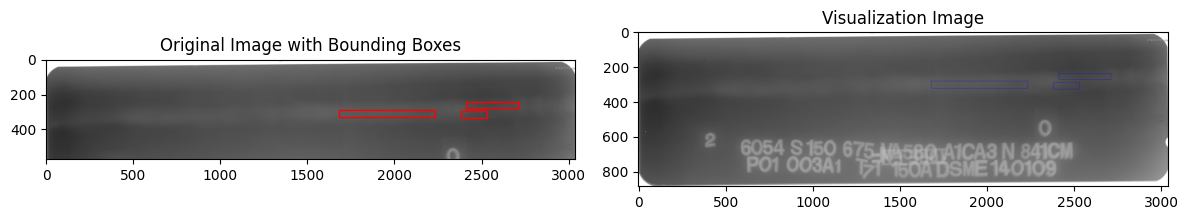

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json

# 이미지와 바운딩 박스 정보를 불러옴
imagedir_path = '/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/data_contrast/before/Image'
visdir_path = '/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/data_contrast/before/vis'
dir_name = 'Others'
image_name = '6054-001180-A1-2.jpg'

ann = pd.read_csv('../annotations_v2/annotations_total_merged.csv')

record = ann[ann['image_name'] == image_name]

# 바운딩 박스 정보를 리스트로 변환
bndboxes = json.loads(record['bndbox'].iloc[0])

# 원본 이미지 경로
original_image_path = os.path.join(imagedir_path, dir_name, image_name)

# 시각화 이미지 경로
vis_image_path = os.path.join(visdir_path, dir_name, image_name)

# 원본 이미지 불러오기
original_img = Image.open(original_image_path)

# 시각화 이미지 불러오기
vis_img = Image.open(vis_image_path)

# 원본 이미지와 바운딩 박스를 그릴 캔버스 생성
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 왼쪽 캔버스에 원본 이미지 그리기
ax[0].imshow(original_img)

# 바운딩 박스 그리기
for bbox in bndboxes:
    x, y, xmax,ymax = bbox
    w=xmax-x
    h=ymax-y
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)

ax[0].set_title('Original Image with Bounding Boxes')

# 오른쪽 캔버스에 시각화 이미지 그리기
ax[1].imshow(vis_img)
ax[1].set_title('Visualization Image')

# 캔버스 간의 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


In [13]:
eval(record['labels'].iloc[0])

2

In [16]:
eval(record['bndbox'].iloc[0])

2412

: 

In [2]:
record

,dataset,image_number,image_name,bndbox,labels,img_shape
4695,Others,4696,6054-001180-A1-2.jpg,"[[2412, 244, 2712, 277], [2382, 293, 2532, 332...","[2, 2, 2]","['3038', '884']"


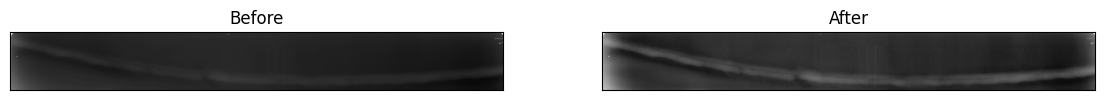

In [4]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# 이미지와 바운딩 박스 정보를 불러옴
before_path = '/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/data_contrast/before/Image'
after_path = '/home/irteam/junghye-dcloud-dir/pathfinder/pathfinder_ai/data_contrast/after/Image'
dir_name = 'Others'
image_name = '6054-001417-2.jpg'

before_image_path = os.path.join(before_path, dir_name, image_name)

after_image_path = os.path.join(after_path, dir_name, image_name)
# 이미지를 흑백으로 불러온다
before_image = cv2.imread(before_image_path, cv2.IMREAD_GRAYSCALE)

# Canny 엣지 검출을 사용
after_image=cv2.imread(after_image_path, cv2.IMREAD_GRAYSCALE)

# 엣지 이미지를 저장하고 파일 경로를 반환
#output_path = '/mnt/data/image_edges.png'
#cv2.imwrite(output_path, edges)

# 엣지 이미지와 원본 이미지를 함께 표시
plt.figure(figsize=(14, 7))

plt.subplot(121), plt.imshow(before_image, cmap='gray')
plt.title('Before'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(after_image, cmap='gray')
plt.title('After'), plt.xticks([]), plt.yticks([])

plt.show()

#output_path


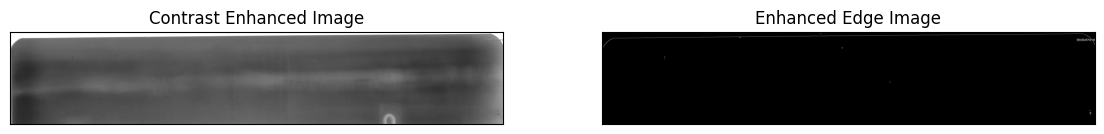

In [30]:
# 이미지 명암 대비를 향상시키고 다시 엣지 검출을 시도한다.

# 이미지 명암 대비를 향상시키기 위한 CLAHE 객체 생성
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# 명암 대비 향상 적용
contrast_enhanced = clahe.apply(image)

# 명암 대비가 향상된 이미지에 대해 다시 Canny 엣지 검출을 시도한다
# 이번에는 임계값을 조정하여 더 세밀하게 엣지를 검출해본다
edges_enhanced = cv2.Canny(contrast_enhanced, 50, 150)

# 향상된 엣지 이미지를 저장하고 파일 경로를 반환
#output_path_enhanced = '/mnt/data/image_edges_enhanced.png'
#cv2.imwrite(output_path_enhanced, edges_enhanced)

# 향상된 엣지 이미지를 표시
plt.figure(figsize=(14, 7))

plt.subplot(121), plt.imshow(contrast_enhanced, cmap='gray')
plt.title('Contrast Enhanced Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges_enhanced, cmap='gray')
plt.title('Enhanced Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

#output_path_enhanced
